In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
path_to_data = r"data/groceries.csv"
transactions = pd.read_csv(path_to_data)

# Question no 02

## First five transactions

In [3]:
transactions

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding item with maximum occourance

In [4]:
no_of_rows, no_of_columns = transactions.shape

no_of_times_bought = {}

for row in range(no_of_rows):
    for column in range(transactions.iloc[row, 0]):
        item = transactions.iloc[row, column + 1]
        if (item in no_of_times_bought.keys()):
            no_of_times_bought[item] = no_of_times_bought[item] + 1
        else:
            no_of_times_bought[item] = 1

In [5]:
max_bought = max(no_of_times_bought, key=no_of_times_bought.get)
print("Item '{0}' is maximum bought '{1}' times.".format(max_bought, max(no_of_times_bought.values())))

Item 'whole milk' is maximum bought '2513' times.


## Length of longest transaction

In [6]:
longest_transaction_index = transactions.iloc[:, 0].idxmax()
longest_transaction = transactions.iloc[longest_transaction_index, 1:].values
print('Length of longest transaction is :', len(longest_transaction))

Length of longest transaction is : 32


### Longest transaction

In [7]:
print(list(longest_transaction))

['frankfurter', 'sausage', 'liver loaf', 'ham', 'chicken', 'beef', 'citrus fruit', 'tropical fruit', 'root vegetables', 'other vegetables', 'whole milk', 'butter', 'curd', 'yogurt', 'whipped/sour cream', 'beverages', 'soft cheese', 'hard cheese', 'cream cheese', 'mayonnaise', 'domestic eggs', 'rolls/buns', 'roll products', 'flour', 'pasta', 'margarine', 'specialty fat', 'sugar', 'soups', 'skin care', 'hygiene articles', 'candles']


## Restructuring the data

In [8]:
temp = transactions.drop(columns=['Item(s)'], axis=1)
temp = transactions.unstack().reset_index()
temp = temp.pivot_table(index = 0, columns = 'level_1', aggfunc = "count", fill_value = 0).T.reset_index()
transactions_copy = temp.copy()
for i in transactions_copy.columns:
    if not type(i) == str:
        transactions_copy = transactions_copy.drop(columns=[i], axis=1)

transactions_copy = transactions_copy.drop(columns=['level_0', 'level_1'], axis=1)
transactions_copy.to_csv('data/groceries_new.csv')

In [3]:
transactions_copy = pd.read_csv('data/groceries_new.csv')
transactions_copy = transactions_copy.drop(transactions_copy.columns[0], axis=1)
transactions_copy_sorted = transactions_copy.reindex(sorted(transactions_copy.columns), axis=1)
transactions_copy_sorted

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
min_support = 0.0025

In [ ]:
frequent_itemsets = apriori(transactions_copy_sorted, min_support = min_support, use_colnames = True)
RULES = association_rules(frequent_itemsets, metric = 'lift')#, min_threshold = min_threshold)

In [26]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
RULES['length'] = RULES['consequents'].apply(lambda x: len(x))

print(frequent_itemsets.tail())
print(RULES.tail())

     support                        itemsets  length
26  0.255516                    (whole milk)       1
27  0.139502                        (yogurt)       1
28  0.074835  (whole milk, other vegetables)       2
29  0.056634        (whole milk, rolls/buns)       2
30  0.056024            (whole milk, yogurt)       2
          antecedents   consequents  antecedent support  consequent support  \
1  (other vegetables)  (whole milk)            0.193493            0.255516   
2        (whole milk)  (rolls/buns)            0.255516            0.183935   
3        (rolls/buns)  (whole milk)            0.183935            0.255516   
4        (whole milk)      (yogurt)            0.255516            0.139502   
5            (yogurt)  (whole milk)            0.139502            0.255516   

    support  confidence      lift  leverage  conviction  length  
1  0.074835    0.386758  1.513634  0.025394    1.214013       1  
2  0.056634    0.221647  1.205032  0.009636    1.048452       1  
3  0.0566

In [12]:
lift = RULES['lift'].values
support = RULES['support'].values
confidence = RULES['confidence'].values

## Top 10 longest freqent itemsets

In [13]:
print(frequent_itemsets.iloc[-10:,1].values)

[frozenset({'whole milk', 'whipped/sour cream', 'root vegetables'})
 frozenset({'yogurt', 'whole milk', 'root vegetables'})
 frozenset({'yogurt', 'whole milk', 'sausage'})
 frozenset({'whole milk', 'tropical fruit', 'soda'})
 frozenset({'yogurt', 'whole milk', 'soda'})
 frozenset({'whole milk', 'tropical fruit', 'whipped/sour cream'})
 frozenset({'yogurt', 'whole milk', 'tropical fruit'})
 frozenset({'yogurt', 'whole milk', 'whipped/sour cream'})
 frozenset({'yogurt', 'whole milk', 'other vegetables', 'root vegetables'})
 frozenset({'yogurt', 'whole milk', 'tropical fruit', 'other vegetables'})]


## Top 10 longest rules

In [14]:
print(RULES.iloc[-10:,:])

                             antecedents  \
1230                (yogurt, whole milk)   
1231            (yogurt, tropical fruit)   
1232          (yogurt, other vegetables)   
1233        (whole milk, tropical fruit)   
1234      (whole milk, other vegetables)   
1235  (tropical fruit, other vegetables)   
1236                            (yogurt)   
1237                        (whole milk)   
1238                    (tropical fruit)   
1239                  (other vegetables)   

                                         consequents  antecedent support  \
1230              (tropical fruit, other vegetables)            0.056024   
1231                  (whole milk, other vegetables)            0.029283   
1232                    (whole milk, tropical fruit)            0.043416   
1233                      (yogurt, other vegetables)            0.042298   
1234                        (yogurt, tropical fruit)            0.074835   
1235                            (yogurt, whole milk)       

## Plotting support versus confidence

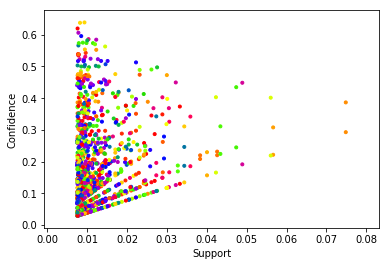

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(support, confidence, marker='.', c=lift, cmap="prism")

plt.xlabel('Support')
plt.ylabel('Confidence')

plt.show()